In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')         # for tokenization
nltk.download('stopwords')    ## for removing stopwords
nltk.download('wordnet')        # For lemmatization (WordNetLemmatizer)
nltk.download('omw-1.4')        # Lemma language data (used with wordnet)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

: 

In [35]:
data=pd.read_csv("/users/noorbasha/Desktop/Jupyter/machine-learning-projects/Naive-Bayes_theorem/spam.csv",encoding='latin-1')
print("data",data)

data         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        N

In [36]:
data_set = data[['v1', 'v2']]
print(data_set)
data_set.columns = ["labels", "message"]  

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [37]:
import nltk
nltk.download('punkt')         # Redownload the sentence tokenizer
nltk.download('punkt_tab')     # <-- specifically add this line

[nltk_data] Downloading package punkt to /Users/noorbasha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/noorbasha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
##preprocessing and tokenizing 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()  # Lowercase for uniformity
    
    # Replace URLs with a token
    text = re.sub(r'http\S+|www.\S+', ' url ', text)
    
    # Replace currency symbols and numbers with generic tokens
    text = re.sub(r'\$\d+|\d+', ' money ', text)
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    words = []
    for word in tokens:
        # Keep only alphabetic words that are not stopwords
        if word.isalpha() and word not in stop_words:
            stemmed = stemmer.stem(word)
            words.append(stemmed)
    
    return " ".join(words)  # Return as space-separated string


            

[nltk_data] Downloading package punkt to /Users/noorbasha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noorbasha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
data_set['clean_text'] = data_set['message'].apply(preprocess)

/var/folders/8b/k8mgmcpj2b3csg8pyw9r0rfc0000gp/T/ipykernel_57100/535407835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['clean_text'] = data_set['message'].apply(preprocess)


In [40]:
print("dataset",data_set['clean_text'])

dataset 0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt may ...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    time tri contact u pound prize claim easi call...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: clean_text, Length: 5572, dtype: object


In [41]:
vectorizer=TfidfVectorizer()
X = vectorizer.fit_transform(data_set['clean_text'])
y=data_set['labels'].map({"ham":0,"spam":1})

In [42]:
##train and test and split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
##apply and  Train Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)



MultinomialNB()

In [44]:
import joblib
##joblib you can dump model so you dont need train everytime a user using app
joblib.dump(classifier, 'model.pkl')

joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [45]:
##Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
y_pred=classifier.predict(X_test)

Accuracy_score=accuracy_score(y_test, y_pred)
print("Accuracy_score",Accuracy_score)
Classification_report=classification_report(y_test, y_pred)
print(Classification_report)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy_score 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Confusion Matrix:
 [[965   0]
 [ 42 108]]


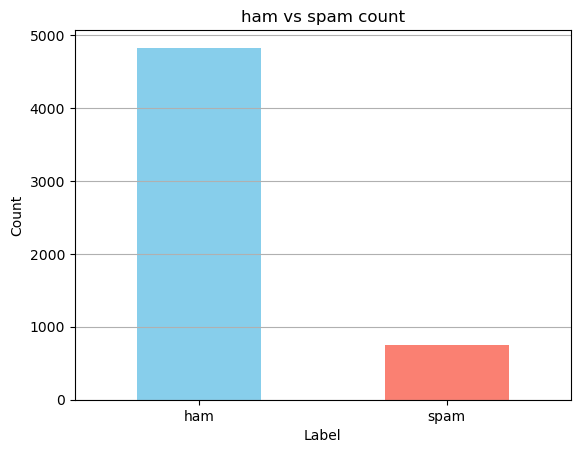

In [46]:
##spam vs ham count
import seaborn as sns
import matplotlib.pyplot as plt

data_set['labels'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("ham vs spam count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y")
# grid nothing but dotted lines
plt.show()

/var/folders/8b/k8mgmcpj2b3csg8pyw9r0rfc0000gp/T/ipykernel_57100/3951756449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set["message_length"]=data_set['message'].apply(len)


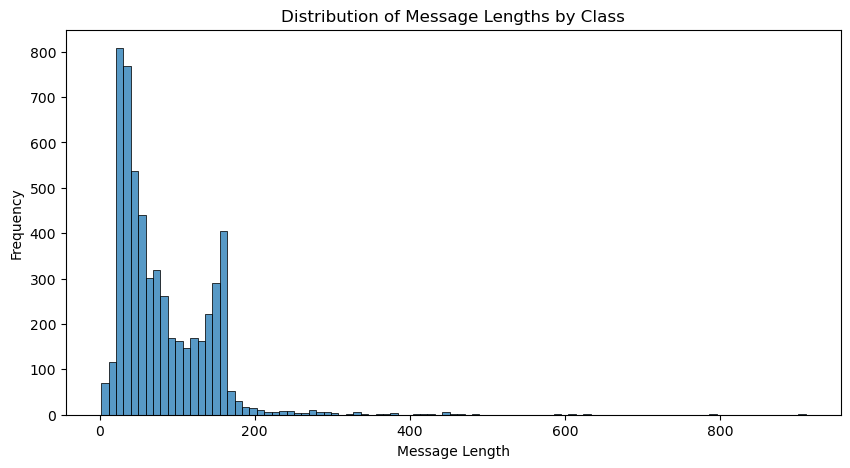

In [47]:
##counting the plotting the message length of messages
data_set["message_length"]=data_set['message'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data_set,x=data_set["message_length"])
plt.title('Distribution of Message Lengths by Class')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()